# Image Enhancement and Object Detection on Pistols in Luggage
In this project we used a variety of image enhancement methods, and Faster R-CNN architecture for the object detection.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/senior project directory')

In [ ]:
# install libraries that aren't included in colab.
!pip install ripser
!pip install detecto

In [46]:
# import all neccessary libraries
import TDAimgprocess as TIP
import os
import time
import ripser
import random
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import matplotlib
%matplotlib inline
import PIL
from skimage.segmentation import chan_vese
from skimage.segmentation import slic
from skimage.filters import roberts
from skimage.morphology import convex_hull_image
import skimage.filters as filters
from skimage.segmentation import active_contour 
import cv2
import pandas as pd
from PIL import Image
import scipy.misc
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

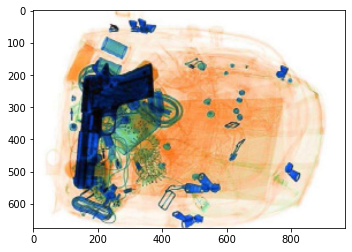

In [47]:
img = mpimg.imread(os.path.join("/content/drive/MyDrive/images to test/image4.JPG"))

plt.imshow(img)
plt.show()


# ISOcontour and Edge Detection

This is the stage in our program where we highlight the noise and tell our later stages where we want to adjust.

Then with our edge detection- it will map out certain targets that stand out the most in an image and our later stages will take what is mapped out and keep the image standing agianst the adgusted gamma.

Time for Topological Image Processing: 00:00:04


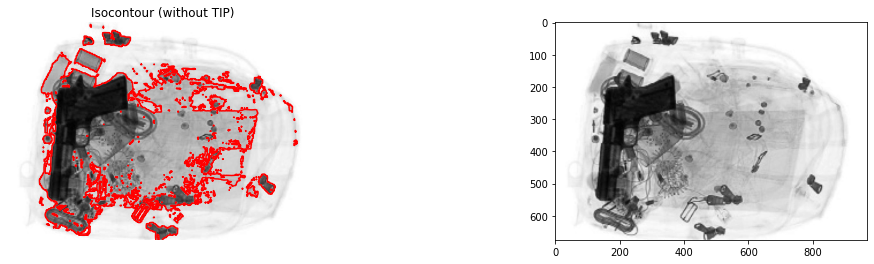

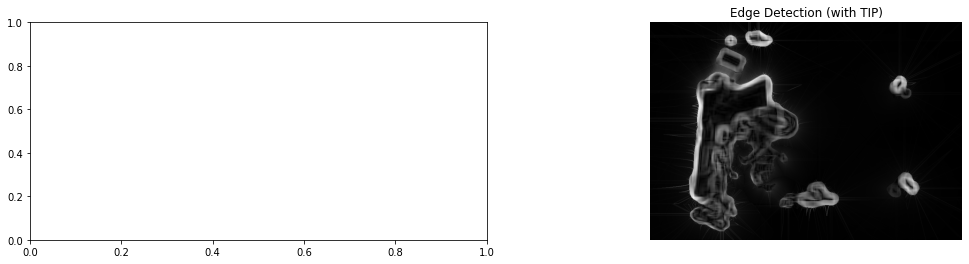

<Figure size 432x288 with 0 Axes>

In [48]:
import time
window_size = 25
border_width = 25
#...
img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise
start_time = time.time()
TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
elapsed_time = time.time() - start_time
print("Time for Topological Image Processing: " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

sgm_without_TIP, contours_without_TIP = TIP.contour_segmentation(img_gray, return_contours=True)
sgm_with_TIP, contours_with_TIP = TIP.contour_segmentation(TIP_img["processed"], return_contours=True)
random.seed(42)
#....
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[0].imshow(sgm_without_TIP, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Edge Detection (without TIP)", fontsize=12)
ax[0].imshow(img_gray, cmap="gray")
for contour in contours_without_TIP:
    ax[0].plot(contour[:,1], contour[:,0], color="red")
ax[0].set_axis_off()
ax[0].set_title("Isocontour (without TIP)", fontsize=12)
plt.imshow(img_gray, cmap="gray")
#...

sgm_without_TIP = roberts(img_gray)
sgm_with_TIP = roberts(TIP_img["processed"])

#...


fig, axes = plt.subplots(1, 2, figsize=(18, 4))
ax = axes.flatten()

ax[1].imshow(sgm_with_TIP, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Edge Detection (with TIP)", fontsize=12)

plt.show()
plt.savefig('save_me.jpg')

#Gamma Stage
 
this is where we are going to stat adjusting levels of gamma and color

In [49]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

### Color Correction

First of all, the green channel must be modified because it's too intense.



In [50]:
original = img
original_const = original

(<matplotlib.axes._subplots.AxesSubplot at 0x7f77d64751d0>,
 (-0.5, 967.5, 674.5, -0.5),
 Text(0.5, 1.0, 'Gamma = 2.0'))

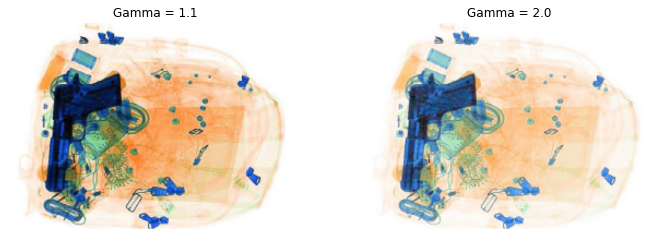

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
gamma = 1.1
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(132), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.1')

gamma = 2.0
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(133), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 2.0')


# Gamma levels
These next few boxes are important becaues this is where we contol how light and dark we apply our correction.

Be warned not all correction will work the same.

Some picture may look better with higher gamma and some may look better with low.

### Contrast & Brightness

Brightness factor must be carefully changed so that small details won't be overbrightened.

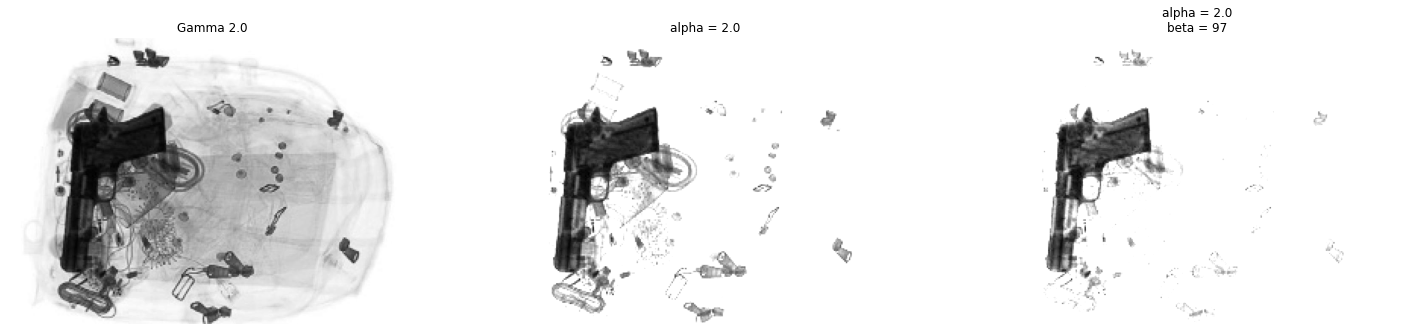

In [52]:
img = cv2.imread('/content/drive/MyDrive/images to test/image4.JPG',0) # loads in grayscale
fig, axes = plt.subplots(1, 3, figsize=(25,15))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.axis('off'), plt.title('Gamma 2.0')

alpha = 2.0
res = cv2.multiply(img, alpha)
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2.0')

beta = 97
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2.0\nbeta = 97')

plt.show()

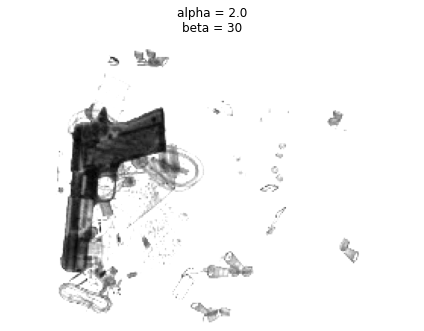

In [53]:
fig, axes = plt.subplots(1,  figsize=(25,15))
alpha = 2.0
res = cv2.multiply(img, alpha)
beta = 30
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2.0\nbeta = 30')

plt.show()

# Now, To Combine All The Methods:



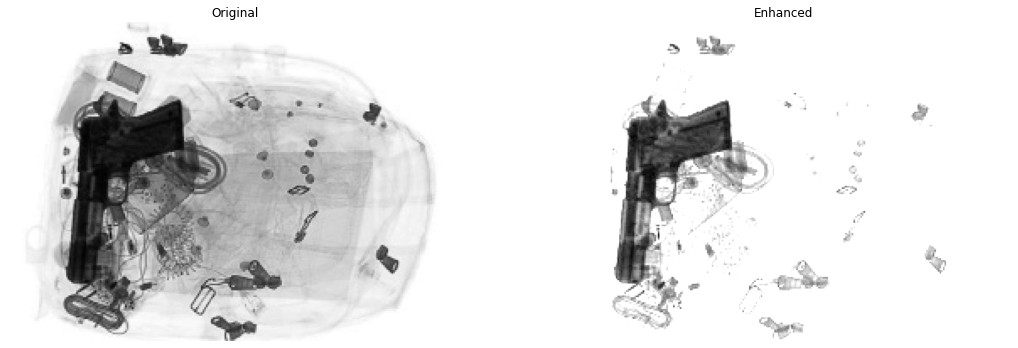

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Enhanced')

plt.show()

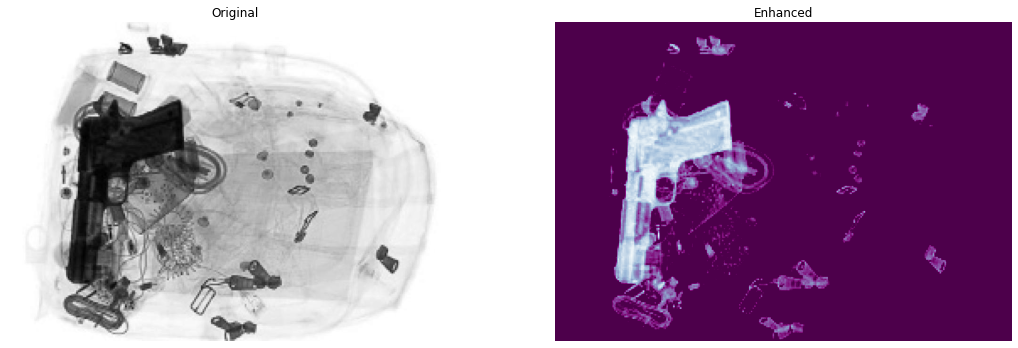

In [55]:
fig, axes = plt.subplots(1, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='BuPu'), plt.axis('off'), plt.title('Enhanced')


fig.savefig('save_me.jpeg', bbox_inches='tight')

# Now, to perform object detection.
We will be using a machine learning model that we trained in a separate notebook for conciseness.

in this first block we will load the machine model with a database pistol images.


In [56]:
# load the machine learning model
model = core.Model.load('/content/drive/MyDrive/500_pistol_imgs/new_model_weights.pth', ['pistol'])

# Moment of Truth
In our last code we run the object detection agianst the original image and our enhanced image.

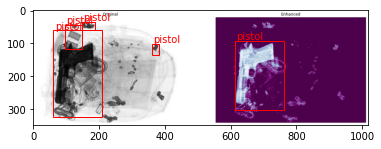

In [57]:
# read an image from the path and make predictions on it.
image = utils.read_image('save_me.jpeg') 
predictions = model.predict(image)
labels, boxes, scores = predictions

# remove the unwanted boxes with thresh. the higher the number, the less boxes.
thresh = 0.2

filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)
